In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
hr = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/WA_Fn-UseC_-HR-Employee-Attrition 2.csv")

#데이터 검사
pd.options.display.max_columns = None
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
hr.shape

(1470, 35)

In [5]:
hr = hr.astype({'JobLevel': 'category', 'StockOptionLevel': 'category', 'Education':'category',
                'MaritalStatus':'category','Attrition':'category', 'OverTime':'category', 'Gender':'category',
                'BusinessTravel':'category', 'Department':'category','EducationField':'category','JobRole':'category'
                })

In [6]:
hr.dtypes

Age                            int64
Attrition                   category
BusinessTravel              category
DailyRate                      int64
Department                  category
DistanceFromHome               int64
Education                   category
EducationField              category
EmployeeCount                  int64
EmployeeNumber                 int64
EnvironmentSatisfaction        int64
Gender                      category
HourlyRate                     int64
JobInvolvement                 int64
JobLevel                    category
JobRole                     category
JobSatisfaction                int64
MaritalStatus               category
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
Over18                        object
OverTime                    category
PercentSalaryHike              int64
PerformanceRating              int64
RelationshipSatisfaction       int64
StandardHours                  int64
S

In [7]:
#변수 제거(모두 같은 값만 가지므로
hr.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber'],axis=1,inplace=True)

In [8]:
#의사결정나무는 정규화 불필요
hr_copy = hr.copy().drop('Attrition',axis=1)

In [9]:
from sklearn.preprocessing import RobustScaler

#hr_copy = hr.copy().drop("Attrition",axis=1)
num_fea = [column for column in hr_copy.columns if hr_copy[column].dtype != "category"]
cat_fea = [column for column in hr_copy.columns if hr_copy[column].dtype == "category"]

#data_copy[num_fea] = RobustScaler().fit_transform(data_copy[num_fea])

#cat_fea.append('Attrition')

In [10]:
#원핫인코더로 더미화, get_dummies도 가능

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

dummies = ohe.fit_transform(hr[cat_fea]).toarray()

df_dummies = pd.DataFrame(dummies, columns = ohe.get_feature_names(hr[cat_fea].columns))

hr_dum=pd.concat([hr_copy[num_fea].reset_index(), df_dummies], axis=1)
hr_dum.drop('index',inplace=True,axis=1)

hr_dum.columns

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Index(['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales', 'Education_1',
       'Education_2', 'Education_3', 'Education_4', 'Education_5',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobLevel_1', 'JobLevel_2',
      

In [ ]:
#더미화( or 원핫 인코더)
#hr_cp = hr.copy()
#x_samp_dum = pd.get_dummies(x_samp[['JobLevel', 'StockOptionLevel', 'Education','MaritalStatus', 'OverTime', 'Gender','BusinessTravel', 'Department','EducationField','JobRole']])
#x_samp = pd.concat([x_samp,x_samp_dum], axis=1)

In [16]:
#set 분리
x = hr_dum
y = hr.Attrition

In [17]:
y.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [13]:
#언더샘플링 (레이블 수 맞추기)
from imblearn.under_sampling import *
#undersample = RandomUnderSampler(sampling_strategy='majority')
#X_samp, y_samp = undersample.fit_resample(x,y)

In [ ]:
#토멕랭크 샘플링
#X_samp, y_samp = TomekLinks().fit_resample(x, y)

In [ ]:
#cnn 샘플링
#X_samp, y_samp = CondensedNearestNeighbour().fit_resample(x, y)

In [19]:
# oss = 토멕랭크 + cnn <채택>
X_samp, y_samp = OneSidedSelection().fit_resample(x,y)

In [20]:
y_samp.value_counts()

No     1115
Yes     237
Name: Attrition, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=4) #,shuffle = True, stratify = y_samp, random_state = 5)

In [39]:
from sklearn.tree import DecisionTreeClassifier

#성장제한 / 파라미터 튜닝
max_depth = [4,5,6,7,8,9,10]
for i in max_depth:
  dt_md = DecisionTreeClassifier(min_samples_leaf = 20
                                 , criterion = "entropy",max_depth = i, class_weight= 'balanced',random_state = 2)
  dt_md.fit(x_train,y_train)
  print("max_depth:",i)
  print('정확도:',dt_md.score(x_test,y_test))


max_depth: 4
정확도: 0.7142857142857143
max_depth: 5
정확도: 0.7755102040816326
max_depth: 6
정확도: 0.7210884353741497
max_depth: 7
정확도: 0.717687074829932
max_depth: 8
정확도: 0.6938775510204082
max_depth: 9
정확도: 0.6870748299319728
max_depth: 10
정확도: 0.6870748299319728


In [43]:
  #가중치 줬을때
  dt_5 = DecisionTreeClassifier(min_samples_leaf = 20,
                                #말단노드최소수  
                                criterion = "entropy",
                                #엔트로피 지수 사용
                                max_depth = 5,
                                #최대성장 
                                class_weight = 'balanced',
                                #가중치 부여
                                random_state=2)
                                
  dt_5.fit(x_train,y_train)
  print('정확도:',dt_5.score(x_test,y_test))

정확도: 0.7755102040816326


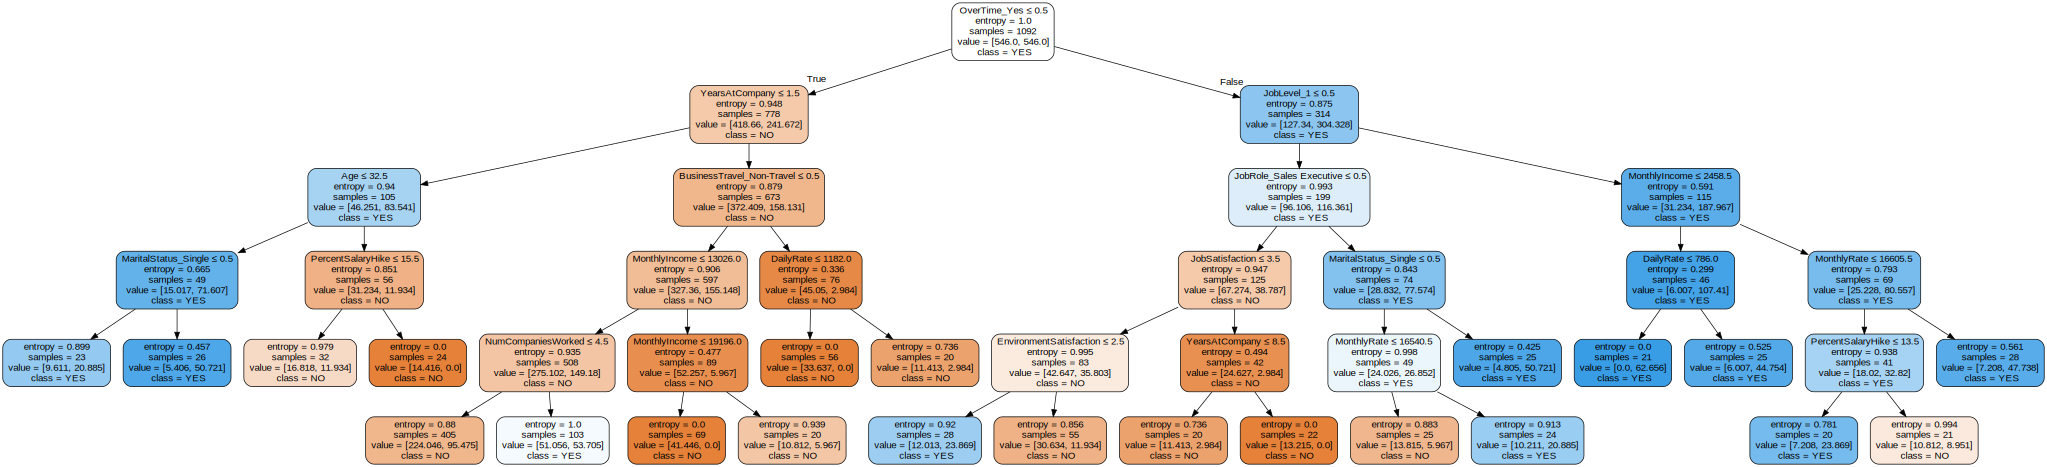

In [ ]:
#시각화
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(dt_5,   # 의사결정나무 모형 대입                 
                               out_file = None,  # file로 변환할 것인가
                               feature_names = x_test.columns,  # feature 이름
                               class_names = ['NO','YES'],  # target 이름
                               filled = True,           # 그림에 색상을 넣을것인가
                               rounded = True,          # 반올림을 진행할 것인가
                               special_characters = True)   # 특수문자를 사용하나

graph = graphviz.Source(dot_data)              
graph

In [44]:
y_predict = dt_5.predict(x_test)

In [45]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predict)  #confusion matrix 표시


array([[203,  48],
       [ 18,  25]])

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict, target_names = ["F", "T"]))

              precision    recall  f1-score   support

           F       0.92      0.81      0.86       251
           T       0.34      0.58      0.43        43

    accuracy                           0.78       294
   macro avg       0.63      0.70      0.65       294
weighted avg       0.83      0.78      0.80       294

